In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [52]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,\
    classification_report

In [25]:
ky_data=pd.read_csv('F:/data sets/kyphosis.csv')
ky_data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [26]:
x=ky_data.drop('Kyphosis',axis=1)
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
5,1,2,16
6,61,2,17
7,37,3,16
8,113,2,16
9,59,6,12


In [27]:
y=ky_data['Kyphosis']
y

0      absent
1      absent
2     present
3      absent
4      absent
5      absent
6      absent
7      absent
8      absent
9     present
10    present
11     absent
12     absent
13     absent
14     absent
15     absent
16     absent
17     absent
18     absent
19     absent
20     absent
21    present
22    present
23     absent
24    present
25     absent
26     absent
27     absent
28     absent
29     absent
       ...   
51     absent
52    present
53     absent
54     absent
55     absent
56     absent
57    present
58     absent
59     absent
60    present
61    present
62     absent
63     absent
64     absent
65     absent
66     absent
67     absent
68     absent
69     absent
70     absent
71     absent
72     absent
73     absent
74     absent
75     absent
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

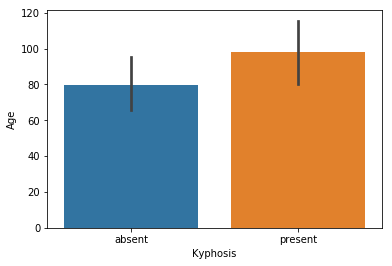

In [28]:
sns.barplot(x='Kyphosis',y='Age',data=ky_data)

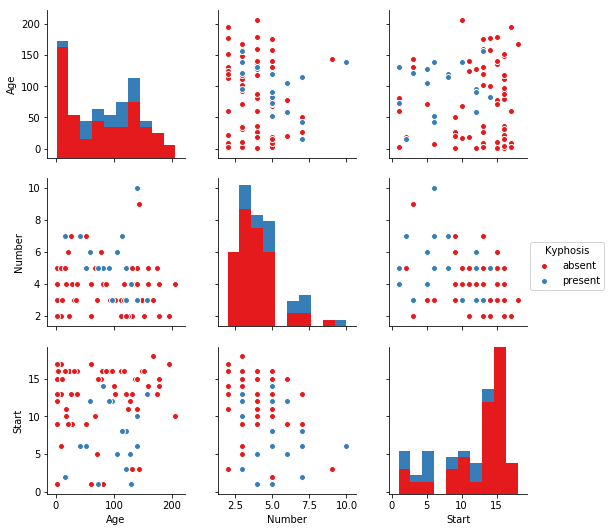

In [29]:
sns.pairplot(ky_data,hue='Kyphosis',palette='Set1')

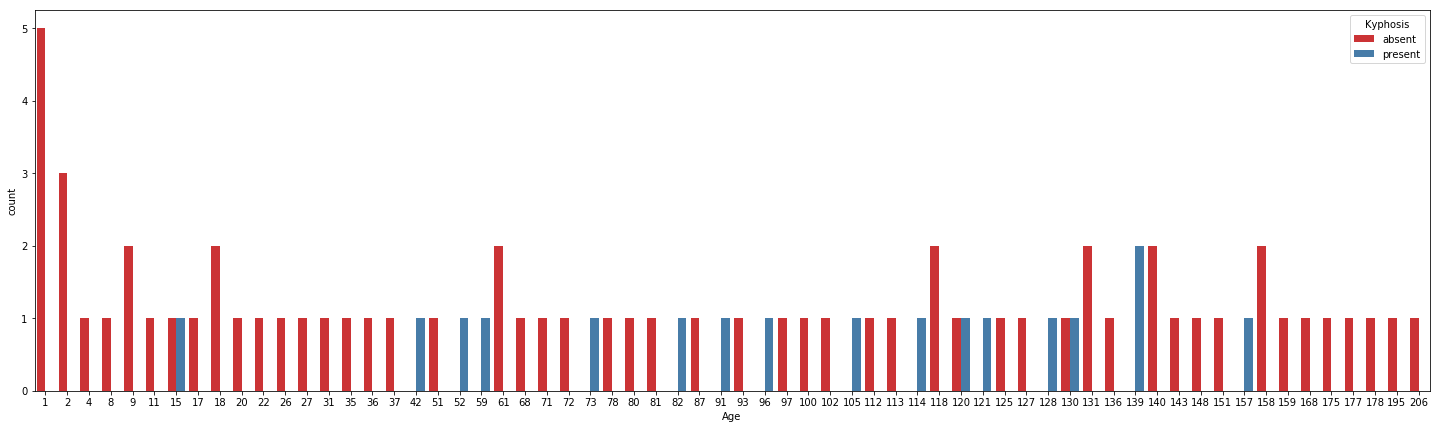

In [30]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Kyphosis',data=ky_data,palette='Set1')

In [50]:
features = list(ky_data.columns[:4])
print(features)

['Kyphosis', 'Age', 'Number', 'Start']


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [57]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
y_pred = model.predict(x_test)
names = ["Decision Tree", "Random Forest"]

In [59]:
classifiers = [DecisionTreeClassifier(criterion = 'entropy'),RandomForestClassifier(criterion = 'entropy')]
results = {}

In [60]:
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, x_train, y_train, cv=5)
    print(scores.mean())
    results[name] = scores

0.7660606060606062
0.803939393939394


In [61]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[16,  4],
       [ 2,  3]], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

     absent       0.89      0.80      0.84        20
    present       0.43      0.60      0.50         5

avg / total       0.80      0.76      0.77        25



In [63]:
accuracies = cross_val_score(estimator = clf, X = x_train, y = y_train,cv = 10)
print(accuracies.mean())

0.7495238095238095


In [81]:
# decision tree individually 
dtree=DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
prediction=dtree.predict(x_test)
prediction

array(['absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent'], dtype=object)

In [83]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

     absent       0.86      0.90      0.88        20
    present       0.50      0.40      0.44         5

avg / total       0.79      0.80      0.79        25



In [84]:
print(confusion_matrix(y_test,prediction))

[[18  2]
 [ 3  2]]


In [85]:
# random forest classifier 
rfc=RandomForestClassifier(criterion = 'entropy')
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
pred=rfc.predict(x_test)
pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [87]:
print(confusion_matrix(y_test,pred))

[[19  1]
 [ 3  2]]


In [88]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

     absent       0.86      0.95      0.90        20
    present       0.67      0.40      0.50         5

avg / total       0.82      0.84      0.82        25

